<a href="https://colab.research.google.com/github/jamesmccarty/ComputationalBiochem/blob/master/DSC_protein.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this jupyter notebook we will analyze some protein DSC data.  

First we need to import some libraries



In [31]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

Now lets look at some data. First we load the dataset using the read_excel function from the pandas module which will take the path of the excel file as an input. 

In [32]:
url = 'https://raw.githubusercontent.com/jamesmccarty/ComputationalBiochem/master/data/DSC_data_S11_Lysozyme.csv'
var = pd.read_csv(url)
print(var)

     T [K]  Cp  [kcal/mol/K]  baseline
0   293.00            0.0094    0.0094
1   296.00            0.0989    0.0989
2   298.80            0.1116    0.0017
3   301.50            0.1811    0.1000
4   304.00            0.2135    0.1000
5   307.00            0.2829    0.1400
6   309.60            0.2790    0.2000
7   312.14            0.4500    0.1640
8   315.00            0.5641    0.2700
9   317.60            1.1460    0.3000
10  320.00            2.1683    0.3300
11  323.00            4.3980    0.5500
12  325.50            7.5000    0.7700
13  328.46           10.9800    1.2000
14  331.00            8.8900    1.6000
15  333.60            5.1900    1.6700
16  336.40            3.1335    1.7700
17  339.00            2.2139    1.7700
18  342.00            1.9534    1.7700
19  344.30            1.8398    1.7700
20  347.18            1.7622    1.7700
21  350.00            1.7586    1.7700


In the data set we have a column for the temperature, the heat capacity, and the extrapolated baseline. Let's separate these columns into separate variables:

In [55]:
temperature = list(var['T [K]'])
Cp = list(var['Cp  [kcal/mol/K]'])
baseline = list(var['baseline'])

For convenience, lets first do a cubic spline interpolation of the data:

In [57]:
from scipy.interpolate import CubicSpline

Cp_fit = CubicSpline(temperature, Cp)
baseline_fit = CubicSpline(temperature,baseline)
xs = np.arange(300,360,0.5)

Now we can make a scatter plot to display the data:

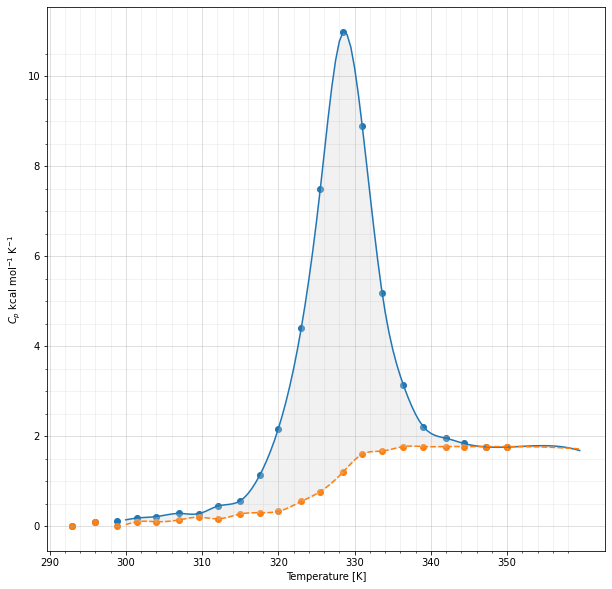

In [91]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

# set major xticks every 2 and minor xticks every 0.5
yticks_major = np.arange(0,11,2)
yticks_minor = np.arange(0,11,0.5)

#set major yticks every 10 and minor xticks every 2
xticks_major = np.arange(290,360,10)
xticks_minor = np.arange(290,360,2)

ax.set_xticks(xticks_major)
ax.set_xticks(xticks_minor, minor=True)
ax.set_yticks(yticks_major)
ax.set_yticks(yticks_minor, minor=True)

ax.scatter(temperature,Cp)
ax.scatter(temperature,baseline)
ax.plot(xs,Cp_fit(xs),'-')
ax.plot(xs,baseline_fit(xs),'--')
ax.fill_between(xs, Cp_fit(xs), baseline_fit(xs), color = 'lightgray', alpha=0.3)
ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
ax.set_xlabel("Temperature [K]")
ax.set_ylabel(r'$C_p$ kcal mol$^{-1}$ K$^{-1}$')
plt.show()


**Question 1** Use the grid to estimate the value of $\Delta C_p$ 

**Question 2** What is the melting temperature of the protein?

**Question 3** Use the grid to estimate the value of $\Delta H$ of unfolding. 

Now to check, we can numerically integrate the area under the curve. Here we use the trapezoid rule: $\int_a^b f(x) dx \approx \sum_{k=1}^N \frac{f(x_{k-1})+f(x_{k})}{2}\Delta x$

In [98]:
# Trapezoid rule:
b = 350 # endpoint 
a = 300 # startpoint

delta_x = 0.5         # spacing of x points
N_points = int((b-a)/delta_x)   # number of points 

integral = 0.0 
# now perform the sum 
for k in range(1,N_points):
  x1 = a+(k-1)*delta_x
  x2 = a+k*delta_x 
  f1 = Cp_fit(x1) - baseline_fit(x1)  
  f2 = Cp_fit(x2) - baseline_fit(x2)
  integral += 0.5*(f1+f2)*delta_x   # trapezoid rule 

print("The value of the integral is",integral)


The value of the integral is 99.51043985681703


How does the value of the integral change if you change the endpoints, a and b. 